In [2]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

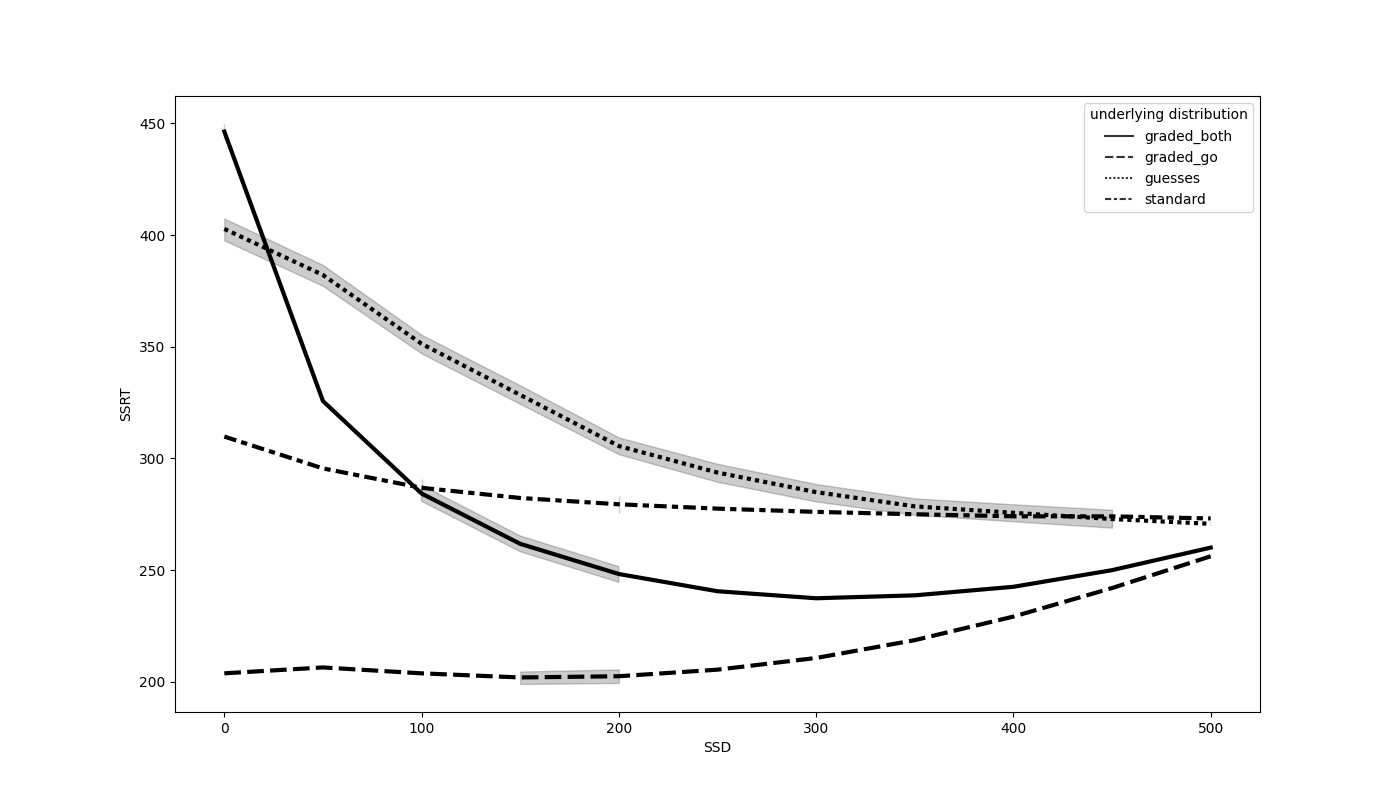

In [12]:
Image('figures/SSRT_by_SSD.png')

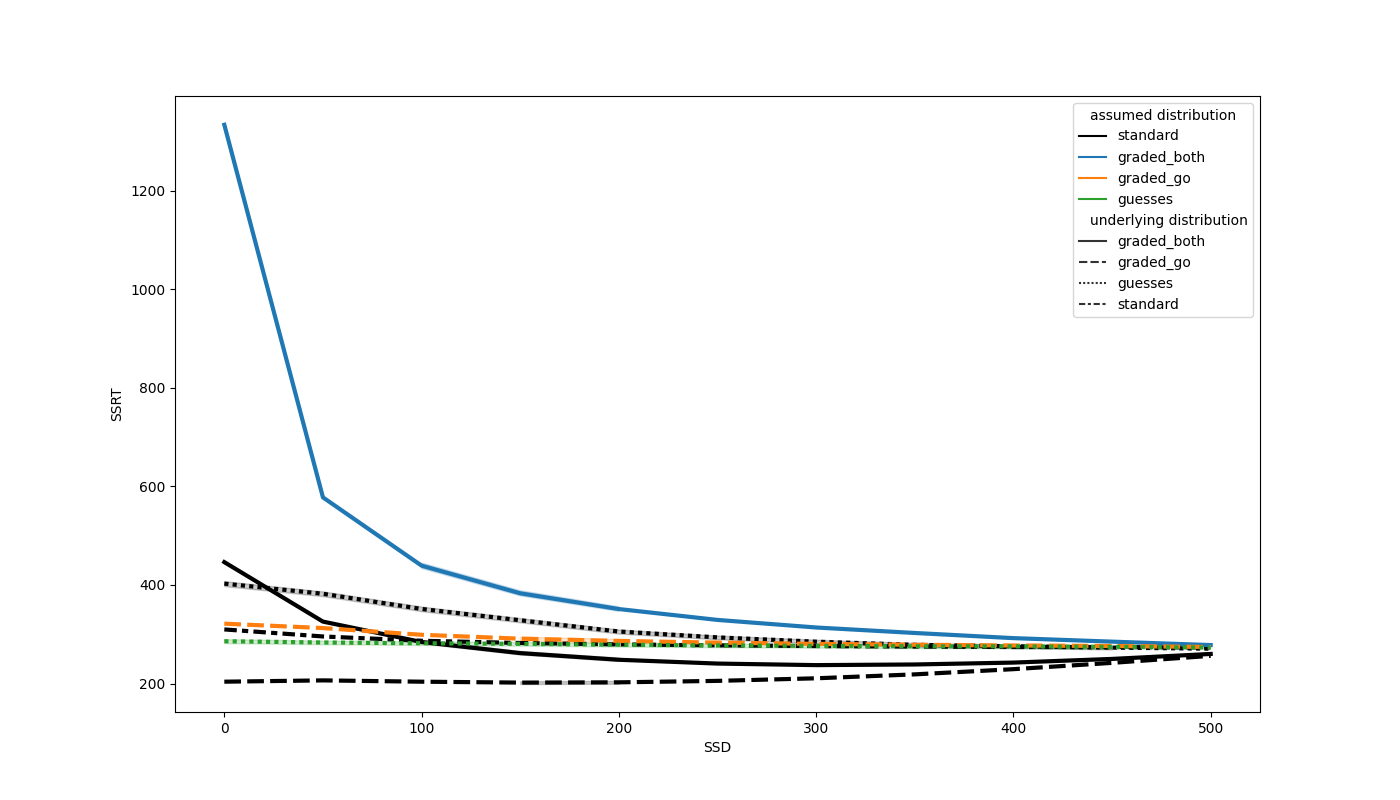

In [13]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

In [ ]:
Image('figures/inhibition_function.png')

# Individual Differences

In [4]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [5]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [6]:
sim_rt_info = pd.read_csv('simulated_data/sim_rt_meanStd.csv', index_col = 0)

In [7]:
# getting expect SSRTs
mus_path = 'abcd_data/assigned_mus.json'
with open(mus_path, 'r') as f:
    mus_dict = json.load(f)
    
mus_df = pd.DataFrame(mus_dict).T

In [8]:
monster_df = pd.concat([mus_df.add_prefix('expected_'), sim_rt_info, df], 1, sort=True)

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))

columns = ['expected_SSRT', 'gen-standard_SSRT-fixed.3', 'gen-standard_SSRT-standard.3']
for idx,coli in enumerate(columns):
    for jdx, colj in enumerate(columns):
        ax = sns.scatterplot(x=colj, y=coli, data=monster_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Expected, Fixed, and Weighted SSRTs', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [ ]:
monster_df[columns].corr(method='spearman')

In [ ]:
curr_df = monster_df.filter(regex='fixed')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Fixed (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [ ]:
curr_df.corr(method='spearman')

In [ ]:
curr_df = monster_df.filter(regex='SSRT-standard')

fig, axes = plt.subplots(4, 4, figsize=(16,16))

for idx,coli in enumerate(curr_df.columns):
    for jdx, colj in enumerate(curr_df.columns):
        ax = sns.scatterplot(x=colj, y=coli, data=curr_df, ax=axes[idx, jdx])
        _ = add_identity(ax, color='k', ls='--')
_ = fig.suptitle('Comparing Weighted (standard) SSRTs across underlying generators', fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=0.94)

In [ ]:
curr_df.corr(method='spearman')

In [ ]:
main_cols = ['expected_SSRT',
             'gen-graded_both_SSRT-standard',
             'gen-graded_go_SSRT-standard.1',
             'gen-guesses_SSRT-standard.2',
             'gen-standard_SSRT-standard.3',
             'gen-graded_both_SSRT-fixed',
             'gen-graded_go_SSRT-fixed.1',
             'gen-guesses_SSRT-fixed.2',
             'gen-standard_SSRT-fixed.3']
monster_df[main_cols].describe()

In [ ]:
df.corr(method='spearman')

In [11]:
simulator_dict = {
    'standard': SimulateData(),
}

ssrtmodel = SSRTmodel(model='replacement')

# set up shared params
SSDs = np.arange(0, 550, 50)
params = {
    'n_trials_stop': 10,
    'n_trials_go': 10,
    'SSDs': SSDs,
}

# SIMULATE INDIVIDUALS
issue_subs = []
for sub in monster_df.loc[monster_df['gen-graded_both_SSRT-standard'].notnull(), :].index[:1]:
    params['mu_go'] = mus_dict[sub]['go']
    params['mu_stop'] = mus_dict[sub]['stop']

    for sim_key in simulator_dict:
        print('mu_stop', params['mu_stop'])
        data = simulator_dict[sim_key].simulate(params)
        print('expected', monster_df.loc[sub, 'expected_SSRT'])
        print('mu_stop', params['mu_stop'])
        print('calculated', ssrtmodel.fit_transform(data)['SSRT'])
        print('*'*40)
        
        
        

mu_stop 0.4553502401619526
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
100
3000
2900
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
150
3000
2850
50
3000
2950
200
3000
2800
50
3000
2950
200
3000
2800
50
3000
2950
200
3000
2800
50
3000
2950
200
3000
2800
50
3000
2950
200
3000
2800
50
3000
2950
200
3000
2800
50
3000
295

In [ ]:
        print('mu_stop', params['mu_stop'])
        data = simulator_dict[sim_key].simulate(params)
        print('expected', monster_df.loc[sub, 'expected_SSRT'])
        print('mu_stop', params['mu_stop'])
        print('calculated', ssrtmodel.fit_transform(data)['SSRT'])
        print('*'*40)

In [ ]:
0.3758425359243561 * (316.06887310947286-50)

# Plot graded Mu Go function

In [ ]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')